In [5]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from dirichlet import mle
from scipy.stats import dirichlet
from sklearn.manifold import TSNE


warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

In [16]:
for filename in glob.glob("data\\experimental\\classification\\001points\\*train*"):
    df = pd.read_csv(filename)
    compositions = df.iloc[:, df.columns.str.contains("z")].drop_duplicates()
    print(compositions.shape)
    alpha = mle(compositions)
    break

(440, 24)
[[ 2.05716941  0.49251235 50.43491523  3.52832521  2.9721829   0.18692786
   1.09930174  0.56035575  0.30277537  1.47180597  1.12995422  1.78963203
   0.74692383  0.94441444  0.93639906  1.67054595  0.84640411  1.44546068
   2.53147382  3.19749167  1.35505192  3.25819392  1.66977638 15.3720062 ]
 [ 1.1955133   0.20350908 56.78233631  4.45466485  2.16492398  0.07122891
   1.89111733  0.11623566  0.15992437  1.25787333  0.43316217  2.91162552
   1.57281999  1.79699315  1.60261869  1.20165735  1.69079545  1.12631945
   0.53092083  1.43982931  0.99153946  0.38909028  1.98744256 14.02785866]
 [ 0.78187726  1.07993482 50.13921312  3.82830587  2.72890736  0.41633347
   0.67133965  0.2952784   0.45040318  0.94279677  0.79887769  2.39330061
   2.26661195  1.36859312  2.07082853  4.50460666  1.91581296  1.15378732
   2.37960156  2.26709181  1.08106312  2.24557557  0.66190979 13.55794942]
 [ 0.54838412  0.84226104 51.93779257  4.3481721   1.89243524  1.27062146
   0.46415073  0.23082691

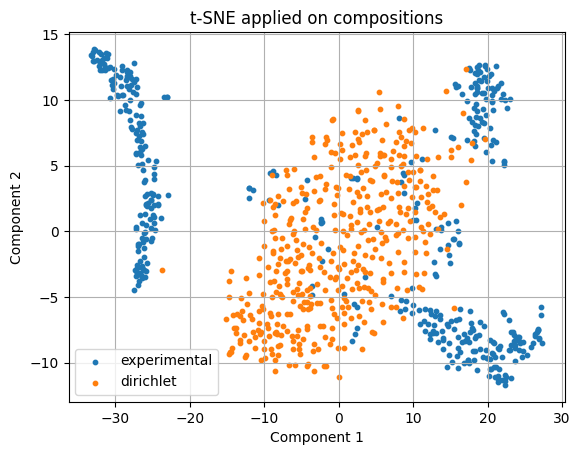

In [35]:
samples_size = compositions.shape[0]
data = np.vstack([compositions.values, (dirichlet.rvs(alpha, size=samples_size) * 100).round(2)])

tsne = TSNE(n_components=2, perplexity=50)
reduced = tsne.fit_transform(data)

f, ax = plt.subplots()
ax.scatter(reduced[:samples_size, 0], reduced[:samples_size, 1], s=10, label="experimental")
ax.scatter(reduced[samples_size:, 0], reduced[samples_size:, 1], s=10, label="dirichlet")
ax.legend()
ax.grid(True)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_title("t-SNE applied on compositions")
plt.show()